# **Bottle-gourd Disease Detection using custom CNN models** 

In [6]:
!pip install git+https://github.com/jacobgil/pytorch-grad-cam.git


!pip install lime

  Cloning https://github.com/jacobgil/pytorch-grad-cam.git to /tmp/pip-req-build-24dqda4x
  Running command git clone --filter=blob:none --quiet https://github.com/jacobgil/pytorch-grad-cam.git /tmp/pip-req-build-24dqda4x
  Resolved https://github.com/jacobgil/pytorch-grad-cam.git to commit 781dbc0d16ffa95b6d18b96b7b829840a82d93d1
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


In [7]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, random_split
from torchvision import datasets, transforms, models
from torchvision.transforms import ToTensor
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score
from pytorch_grad_cam import GradCAM, GradCAMPlusPlus, EigenCAM
from pytorch_grad_cam.utils.image import show_cam_on_image
from lime import lime_image
import zipfile
import os
from tqdm import tqdm  # Import tqdm for progress bars

## Pre-Processing and Load the Dataset

In [8]:
# Define transformations with potential augmentations
transform_train = transforms.Compose([
    transforms.RandomResizedCrop(224),      
    transforms.RandomHorizontalFlip(),     
    transforms.ToTensor(),                  
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
])

transform_test = transforms.Compose([
    transforms.Resize((224, 224)),         
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
])
# Load dataset
dataset = datasets.ImageFolder(root="/kaggle/input/bottle-gourd/Bottle gourd", transform=transform_train)
train_size = int(0.7 * len(dataset))
val_size = int(0.2 * len(dataset))
test_size = len(dataset) - train_size - val_size
train_dataset, val_dataset, test_dataset = random_split(dataset, [train_size, val_size, test_size])
# Apply test transformation to validation and test sets

val_dataset.dataset.transform = transform_test
test_dataset.dataset.transform = transform_test

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

['Anthracnose', 'Downey mildew', 'Fresh leaf']
{'Anthracnose': 0, 'Downey mildew': 1, 'Fresh leaf': 2}
3


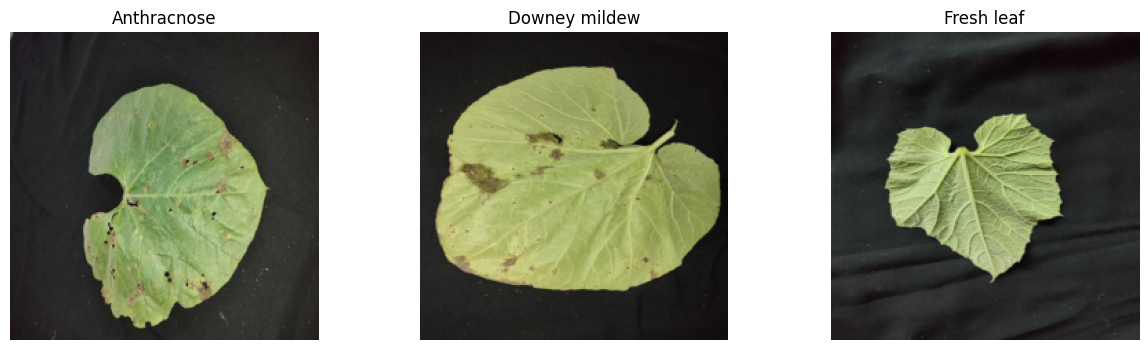

In [12]:
class_names = dataset.classes
print(class_names)
print(dataset.class_to_idx)
# Output: {'anthracnose': 0, 'downey mildew': 1, 'fresh leaf': 2}
num_classes = len(class_names)
print(num_classes)
fig, axs = plt.subplots(1, num_classes, figsize=(15, 4))
# Dictionary to track displayed images per class
displayed_classes = {class_name: False for class_name in class_names}

# Loop through the data to get at least one sample from each class
for images, labels in train_loader:
    for img, label in zip(images, labels):
        class_name = class_names[label]
        # Display the image if not already displayed for this class
        if not displayed_classes[class_name]:
            img = img.permute(1, 2, 0).numpy()
            img = (img * 0.5) + 0.5  # Unnormalize the image
            axs[label].imshow(np.clip(img, 0, 1))  # Clip to valid range
            axs[label].set_title(class_name)
            axs[label].axis('off')
            displayed_classes[class_name] = True  # Mark as displayed

        # Break if all classes are displayed
        if all(displayed_classes.values()):
            break

    if all(displayed_classes.values()):
        break
plt.show()